***Vorlesung 'Syntax natürlicher Sprachen'***

--- 


# FCFG mit Gap-Introduction (*long distance dependencies*)

### https://www.nltk.org/book/ch09.html#unbounded-dependency-constructions

#### vgl. https://www.nltk.org/book/ch09.html#auxiliary-verbs-and-inversion


In [1]:
import nltk
from nltk import Tree

### 1. Ausgangsgrammatik ohne Inversionsregel und Gap-Introduction:

1


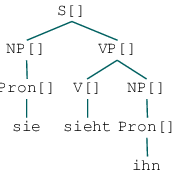

In [2]:
gramstring = r"""
% start S
    
    S -> NP VP
    VP  -> V NP     
   
   
    NP -> Pron

    Pron   -> "sie"
    Pron   -> "ihn"
    V   -> "sieht" 
"""

grammar = nltk.grammar.FeatureGrammar.fromstring(gramstring)
parser = nltk.parse.FeatureChartParser(grammar,trace=0)

#'sie (sieht ihn)VP'
sent = 'sie sieht ihn'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    #tree.pretty_print(unicodelines=True)
    display(tree)

In [3]:
#Regeln fehlen noch..
sent = 'sieht sie ihn'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    #tree.pretty_print(unicodelines=True)
    display(tree)

0


---

### 2. FCFG mit Inversionsregel und Gap-Introduction über Slash-Syntax:

- `VP/NP` entspricht `VP[SLASH=NP]` (NLTK verarbeitet Slash als Merkmal)  
- `VP/NP` = *VP ohne NP / mit NP-Lücke*
- `NP/NP -> ` = Realisierung *NP ohne NP* als leeren String (ε)

1


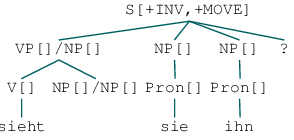

In [4]:
gramstring = r"""
% start S
    
    S[-INV] -> NP VP[-INV]
    VP[-INV]  -> V NP     
    
#INVERSION SUBJEKT-VP in FRAGESATZ + MOVEMENT OBJEKT (Gap-Introduction):
    S[+INV, +MOVE]  -> VP/NP NP NP '?'
    
#Gap-Information wird heruntergereicht:    
    VP/?x  -> V NP/?x 
    NP/NP ->
    
    
    NP -> Pron

    Pron   -> "sie"
    Pron   -> "ihn"
    V   -> "sieht" 
"""

grammar = nltk.grammar.FeatureGrammar.fromstring(gramstring)
parser = nltk.parse.FeatureChartParser(grammar,trace=0)

#'(sieht GAP=NP/NP)VP/NP sie (ihn)NP'
sent = 'sieht sie ihn ?'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    #tree.pretty_print(unicodelines=True)
    display(tree)

1


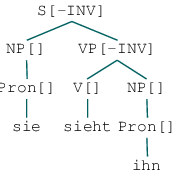

In [5]:
#'sie (sieht ihn)VP'
sent = 'sie sieht ihn'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    #tree.pretty_print(unicodelines=True)
    display(tree)

1


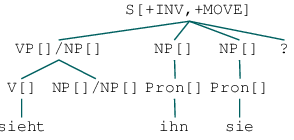

In [6]:
#NEGATIVBEISPIEL:
sent = 'sieht ihn sie ?'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    #tree.pretty_print(unicodelines=True)
    display(tree)    
    

---

### 3. FCFG mit zusätzlichem `CASE`-Constraint:

1


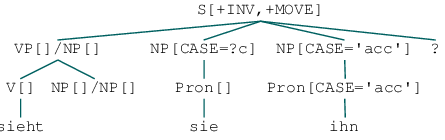

In [7]:
gramstring = r"""
% start S
    
    S[-INV] -> NP[CASE=nom] VP[-INV]
    VP[-INV]  -> V NP[CASE=acc]     
    
#INVERSION SUBJEKT-VP in FRAGESATZ + MOVEMENT OBJEKT (Gap-Introduction):
    S[+INV, +MOVE]  -> VP/NP NP[CASE=nom] NP[CASE=acc] '?'
    
#Gap-Information wird heruntergereicht:    
    VP/?x  -> V NP/?x 
    NP/NP ->
    
    
    NP[CASE=?c] -> Pron[CASE=?c]

    Pron   -> "sie"
    Pron[CASE=acc]   -> "ihn"
    V   -> "sieht" 
"""

grammar = nltk.grammar.FeatureGrammar.fromstring(gramstring)
parser = nltk.parse.FeatureChartParser(grammar,trace=0)

#'(sieht GAP=NP/NP)VP/NP sie (ihn)NP'
sent = 'sieht sie ihn ?'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    #tree.pretty_print(unicodelines=True)
    display(tree)

1


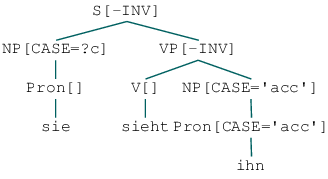

In [8]:
#'sie (sieht ihn)VP'
sent = 'sie sieht ihn'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    #tree.pretty_print(unicodelines=True)
    display(tree)

In [9]:
#NEGATIVBEISPIEL:
sent = 'sieht ihn sie ?'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    #tree.pretty_print(unicodelines=True)
    display(tree)    

0


---

### 4. FCFG mit getrennten Inversions- und Movement-Regeln:

1


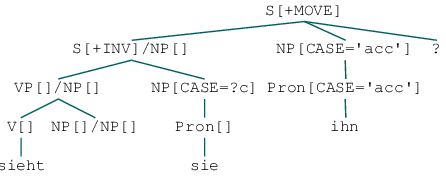

In [10]:
gramstring = r"""
% start S

    S[-INV] -> NP[CASE=nom] VP[-INV]
    VP[-INV]  -> V NP[CASE=acc]     


#SCHRITT 1 = SUBJEKT-VP-INVERSION: '(sieht ihn)VP-INV sie': 
    S[+INV]/?x  -> VP/?x NP[CASE=nom]

#SCHRITT 2 = MOVEMENT von OBJEKT aus VP an SATZENDE: '(sieht)VP-INV/NP sie (ihn)NP-acc?':
#(Gap-Introduction)
    S[+MOVE] -> S[+INV]/NP NP '?'

#Gap-Information wird heruntergereicht:    
    VP/?x  -> V NP/?x 
    NP/NP ->    
    
    
    NP[CASE=?c] -> Pron[CASE=?c]

    Pron   -> "sie"
    Pron[CASE=acc]   -> "ihn"
    V   -> "sieht" 
"""

grammar = nltk.grammar.FeatureGrammar.fromstring(gramstring)
parser = nltk.parse.FeatureChartParser(grammar,trace=0)

#'((sieht GAP=NP/NP)VP/NP sie)S/NP (ihn)NP'
sent = 'sieht sie ihn ?'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    #tree.pretty_print(unicodelines=True)
    display(tree)

1


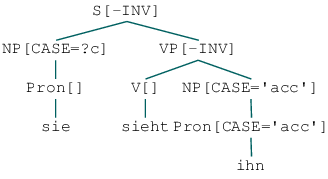

In [11]:
#'sie (sieht ihn)VP'
sent = 'sie sieht ihn'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    #tree.pretty_print(unicodelines=True)
    display(tree)

In [12]:
#NEGATIVBEISPIEL:
sent = 'sieht ihn sie ?'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    #tree.pretty_print(unicodelines=True)
    display(tree)    
    

0
